In [130]:
import os
import pandas as pd
import save_and_load
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
            
#prepares the dataframe passed as a parameter and returns an X and y with y being cast to categorial
def prepare_data(dataframe):
    #collect the columns names for non-target features
    result = []
    for x in dataframe.columns:
        if (x == 'attack') or (x == 'defense') or (x == 'speed') or (x == 'sp_defense') or (x == 'sp_attack') or (x == 'hp'):
            result.append(x)
        elif True and ((x == 'weight_kg') or (x == 'height_m')):
            #added this sepperate if statement to have to option to exlude weight and height from being considered
            result.append(x)

    #get data (often called X) and target (often calle y) and display its shape
    X = dataframe[result].values
    y = dataframe['is_legendary'].values
    print(X.shape)
    print(y.shape)

    y = keras.utils.to_categorical(dataframe['is_legendary'].to_numpy())
    return X, y

# output prediciton accuracy of a model on a given X and compare it to the given y of correct values, 
# put True or False as the last parameter to determine if additonal information on predictions should be displayed
def show_prediction(model, X, y, show):
    # make a prediction using all the data
    pred = model.predict(X)
    # show the shape if the inputs
    if show:
        print(pred.shape)
        print(y.shape)
        print("\n Predictions: \n")
        print(np.round(pred[0:20], 3))
        print("\n Actual values: \n")
        print(y[0:20])
    pred_val = np.argmax(pred,axis=1)
    y_compare = np.argmax(y,axis=1)
    print("\n Predictions: \n")
    print(pred_val[0:20])
    print("\n Actual values: \n")
    print(y_compare[0:20])

    #print the accuracy of the model
    score = metrics.accuracy_score(y_compare, pred_val)
    print("Accuracy score: {}".format(score))
    return pred, pred_val, y_compare

path = "."  #absolute or relative path to the folder containing the file. 
            #"." for current folder

#import the data from the dataset
filename_read = os.path.join(path, "pokemon.csv")
df = pd.read_csv(filename_read)

#show the order of the first few entries
print(df[0:5]['is_legendary'])
#shuffle them (with random seed 92)
np.random.seed(92)
df = df.sample(frac=1).reset_index(drop=True)
#check if they have been shuffeled
print(df[0:5]['is_legendary'])

#copy the dataframe to encode it without changing the initial dataframe
encodeddf = df.copy(deep=True)

0    0
1    0
2    0
3    0
4    0
Name: is_legendary, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: is_legendary, dtype: int64


In [131]:
trainingdf = encodeddf[0:721]
holdoutdf = encodeddf[722:890]

print("Total Non-/Legendary Counts: \n" + str(encodeddf['is_legendary'].value_counts()) + "\n")
print("Training Non-/Legendary Counts: \n" + str(trainingdf['is_legendary'].value_counts()) + "\n")
print("Holdout Non-/Legendary Counts: \n" + str(holdoutdf['is_legendary'].value_counts()) + "\n")

Total Non-/Legendary Counts: 
0    813
1     77
Name: is_legendary, dtype: int64

Training Non-/Legendary Counts: 
0    662
1     59
Name: is_legendary, dtype: int64

Holdout Non-/Legendary Counts: 
0    150
1     18
Name: is_legendary, dtype: int64



In [132]:
X, y = prepare_data(trainingdf)

# make a sequential model and train it using KFold splits
model = Sequential()
model.add(Dense(30, input_dim=X.shape[1], activation='relu'))
#model.add(Dense(256, activation='relu'))
model.add(Dense(y.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics = keras.metrics.AUC(), optimizer='adam')

kf = KFold(6)

for train, test in kf.split(X):
    X_train = X[train]
    y_train = y[train]
    X_test = X[test]
    y_test = y[test]

    model.fit(X_train,y_train,verbose=0,epochs=100)
    pred = model.predict(X_test)
    pred = np.argmax(pred,axis=1)
    y_compare = np.argmax(y_test,axis=1) 
    score = metrics.accuracy_score(y_compare, pred)
    print("Accuracy score: {}".format(score))

# save the model
save_and_load.save_model(model, path, "seqKFoldLegendary")

(721, 8)
(721,)
Accuracy score: 0.8842975206611571
Accuracy score: 0.9583333333333334
Accuracy score: 0.9583333333333334
Accuracy score: 0.9083333333333333
Accuracy score: 0.95
Accuracy score: 0.9166666666666666
Save model? y/n : y


(721, 8)
(721,)
(721, 8)
(721, 2)
(168, 8)
(168,)
___KNN___
Predictions form the classifier:
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
Target values:
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
The accuracy is:  93.45238095238095 %
___RANDOM FOREST___
Predictions form the classifier:
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
Target values:
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
The accuracy is:  94.64285714285714 %
[0.9226190476190477, 0.8511904761904762, 0.9345238095238095, 0.8928571428571429, 0.9404761904761905, 0.9285714285714286, 0.9464285714285714, 0.9345238095238095, 0.9464285714285714, 0.9226190476190477, 0.9523809523809523, 0.9345238095238095, 0.9404761904761905, 0.9285714285714286, 0.9285714285714286, 0.9285714285714286, 0.9464285714285714, 0.9166666666666666, 0.9404761904761905, 0.9404761904761905, 0.9345238095238095, 0.9345238095238095, 0.9404761904761905, 0.9166666666666666, 0.9583333333333334, 0.9404761904761905, 0.9285714285714286, 0.9404761904761905, 0.9

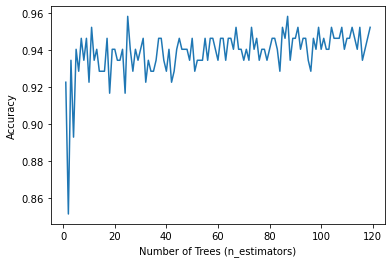

In [133]:
X, y = prepare_data(trainingdf)
# Create and fit a nearest-neighbor classifier
# Using the data and target split from the previous section called X and y
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X, y) 

# Create and fit a random forest classifier
# Using the data and target split from the previous section called X and y
from sklearn.ensemble import RandomForestClassifier
#Instantiate the model with 10 trees and entropy as splitting criteria
Random_Forest_model = RandomForestClassifier(n_estimators=50,criterion="entropy")
#Train the model
Random_Forest_model.fit(X, y)


#training and test set
print(X.shape)
print(y.shape)
X_test, y_test = prepare_data(holdoutdf)


#knn
print("___KNN___")
print("Predictions form the classifier:")
y_pred = knn.predict(X_test)
print(y_pred[:5])
print("Target values:")
print(y_test[0:5])
accuracy = accuracy_score(y_pred, y_test)
print('The accuracy is: ',accuracy*100,'%')
#random forest
print("___RANDOM FOREST___")
print("Predictions form the classifier:")
y_pred = Random_Forest_model.predict(X_test)
print(y_pred[:5])
print("Target values:")
print(y_test[:5])
accuracy = accuracy_score(y_pred, y_test)
print('The accuracy is: ',accuracy*100,'%')

#investigates the accuracy over a range of estimators plotting the results
accuracy_data = []
nums = []
for i in range(1,120):
    rf_model = RandomForestClassifier(n_estimators=i,criterion="entropy")
    rf_model.fit(X, y)
    y_model = rf_model.predict(X_test)
    accuracy = accuracy_score(y_model, y_test)
    accuracy_data.append(accuracy)
    nums.append(i)
    
print(accuracy_data)
plt.plot(nums,accuracy_data)
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.show()

In [134]:
""" # Commented out as it is not used to document on the module and because it makes teh confussion matrix harder to read
#Applying PCA to visualize possible relationships that exists in the data
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#prepare X and y for all the data
X, y = prepare_data(encodeddf)

sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

pca = PCA(2)  # project from 8 to 2 dimensions
projected = pca.fit_transform(X_std)
print(X_std.shape)
print(projected.shape)
#display the highhest explained variance and ratio for both classes
print("Explained Variance: " + str(pca.explained_variance_))
print("Explained Variance Ratio: " + str(pca.explained_variance_ratio_))

plt.clf()
plt.scatter(projected[:, 0], projected[:, 1],
            c=np.argmax(y,axis=1), edgecolor='none', alpha=0.9,
            cmap=plt.cm.get_cmap('tab10', 2))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();
plt.xlim(-4, 7.5)
plt.ylim(-4, 8)
plt.show()
""""""
for count in range(0, len(encodeddf['is_legendary'].unique())):
    print("is legendary: " + str(count))
    #prepare X and y for each indivual type
    X, y = prepare_data(encodeddf[encodeddf['is_legendary'] == count])
    
    sc = StandardScaler()
    sc.fit(X)
    X_std = sc.transform(X)

    pca = PCA(2)  # project from 8 to 2 dimensions
    projected = pca.fit_transform(X_std)
    print(X_std.shape)
    print(projected.shape)
    #display the highhest explained variance and ratio for the classes individualy
    print("Explained Variance: " + str(pca.explained_variance_))
    print("Explained Variance Ratio: " + str(pca.explained_variance_ratio_))

    plt.scatter(projected[:, 0], projected[:, 1],
                c=np.argmax(y,axis=1), edgecolor='none', alpha=0.9,
                cmap=plt.cm.get_cmap('tab10', 2))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.colorbar();
    plt.xlim(-4, 7.5)
    plt.ylim(-4, 8)
    plt.show()"""

' # Commented out as it is not used to document on the module and because it makes teh confussion matrix harder to read\n#Applying PCA to visualize possible relationships that exists in the data\n%matplotlib inline\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport seaborn as sns; sns.set()\nfrom sklearn.decomposition import PCA\nfrom sklearn.preprocessing import StandardScaler\n\n#prepare X and y for all the data\nX, y = prepare_data(encodeddf)\n\nsc = StandardScaler()\nsc.fit(X)\nX_std = sc.transform(X)\n\npca = PCA(2)  # project from 8 to 2 dimensions\nprojected = pca.fit_transform(X_std)\nprint(X_std.shape)\nprint(projected.shape)\n#display the highhest explained variance and ratio for both classes\nprint("Explained Variance: " + str(pca.explained_variance_))\nprint("Explained Variance Ratio: " + str(pca.explained_variance_ratio_))\n\nplt.clf()\nplt.scatter(projected[:, 0], projected[:, 1],\n            c=np.argmax(y,axis=1), edgecolor=\'none\', alpha=0.9,\n            cm

(168, 8)
(168,)
Holdout Non-/Legendary Counts: 
0    150
1     18
Name: is_legendary, dtype: int64


 Predictions: 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]

 Actual values: 

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0]
Accuracy score: 0.9464285714285714


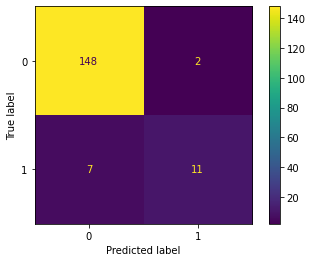

In [135]:
# Test the holdout set with the trained model saved in this folder 
# (loading a save is currently redundant as the shuffling is done without a set random seed)
X_test, y_test = prepare_data(holdoutdf)

model = save_and_load.model_loader(path, "seqKFoldLegendary")

print("Holdout Non-/Legendary Counts: \n" + str(holdoutdf['is_legendary'].value_counts()) + "\n")

pred, pred_val, y_compare = show_prediction(model, X_test, y_test, False)

#plot a confusion matrix for the predicitons
cm = confusion_matrix(y_compare, pred_val)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()